### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
#Import relevant libraries and allot an alias
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [11]:
# Read data from the .csv file on a given path
data = pd.read_csv('data/coupons.csv')

In [12]:
#Enable display of all columns and study a sample
pd.set_option("display.max_columns", None)
data.sample(5)



,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
2512,Work,Alone,Sunny,80,7AM,Restaurant(20-50),1d,Male,21,Single,0,Some college - no degree,Student,$100000 or More,NaN,less1,less1,1~3,less1,never,1,1,0,0,1,0
8042,No Urgent Place,Friend(s),Sunny,55,6PM,Carry out & Take away,1d,Male,31,Single,0,Some college - no degree,Unemployed,$12500 - $24999,NaN,1~3,less1,4~8,less1,never,1,1,0,0,1,1
1029,Work,Alone,Sunny,55,7AM,Bar,1d,Female,50plus,Divorced,1,Graduate degree (Masters or Doctorate),Retired,$12500 - $24999,NaN,1~3,4~8,4~8,4~8,less1,1,1,1,0,1,1
8239,No Urgent Place,Friend(s),Sunny,80,6PM,Coffee House,1d,Male,50plus,Married partner,1,Graduate degree (Masters or Doctorate),Education&Training&Library,$87500 - $99999,NaN,never,4~8,1~3,4~8,less1,1,0,0,0,1,1
7501,Work,Alone,Snowy,30,7AM,Restaurant(20-50),1d,Male,26,Single,0,Bachelors degree,Unemployed,$62500 - $74999,NaN,4~8,never,4~8,1~3,less1,1,1,1,0,1,0


In [13]:
#Study descriptive statistics of the data
data.describe()


,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


Description of the Data
-Total rows - 12684
-Data is dominated by drivers with NO/One child.
-Coupon (any) acceptance rate is approx 57%

In [14]:
#Study types of variables and null entries
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

2. Investigate the dataset for missing or problematic data.

In [15]:
#Study null values
data.isnull().sum()


,0
destination,0
passanger,0
weather,0
temperature,0
time,0
coupon,0
expiration,0
gender,0
age,0
maritalStatus,0


In [16]:
#Find set of values of categorical variables to find any discreprancy in data.
for column in data.select_dtypes(include=["object"]).columns:
  print(f"column: {column}")
  print(data[column].unique())
  print("\n")

column: destination
['No Urgent Place' 'Home' 'Work']


column: passanger
['Alone' 'Friend(s)' 'Kid(s)' 'Partner']


column: weather
['Sunny' 'Rainy' 'Snowy']


column: time
['2PM' '10AM' '6PM' '7AM' '10PM']


column: coupon
['Restaurant(<20)' 'Coffee House' 'Carry out & Take away' 'Bar'
 'Restaurant(20-50)']


column: expiration
['1d' '2h']


column: gender
['Female' 'Male']


column: age
['21' '46' '26' '31' '41' '50plus' '36' 'below21']


column: maritalStatus
['Unmarried partner' 'Single' 'Married partner' 'Divorced' 'Widowed']


column: education
['Some college - no degree' 'Bachelors degree' 'Associates degree'
 'High School Graduate' 'Graduate degree (Masters or Doctorate)'
 'Some High School']


column: occupation
['Unemployed' 'Architecture & Engineering' 'Student'
 'Education&Training&Library' 'Healthcare Support'
 'Healthcare Practitioners & Technical' 'Sales & Related' 'Management'
 'Arts Design Entertainment Sports & Media' 'Computer & Mathematical'
 'Life Physical Social 

In [17]:
#Find set of values of numerical variables
for column in data.select_dtypes(include=["int64"]).columns:
  print(f"column: {column}")
  print(data[column].unique())
  print("\n")

column: temperature
[55 80 30]


column: has_children
[1 0]


column: toCoupon_GEQ5min
[1]


column: toCoupon_GEQ15min
[0 1]


column: toCoupon_GEQ25min
[0 1]


column: direction_same
[0 1]


column: direction_opp
[1 0]


column: Y
[1 0]




3. Decide what to do about your missing data -- drop, replace, other...

In [18]:
#Find proportion of null values in other columns
#Higher the proportion safer it is to drop the column, lower the proprotion, safer it gets to drop the resspective row/index
display((data[["car", "Bar", "CoffeeHouse","CarryAway", "RestaurantLessThan20", "Restaurant20To50"]].isnull().sum())/data.shape[0])

,0
car,0.991485
Bar,0.008436
CoffeeHouse,0.017108
CarryAway,0.011905
RestaurantLessThan20,0.010249
Restaurant20To50,0.014901


In [19]:
#We drop the car column, proportion of null in car column is 0.99.
data= data.drop("car", axis=1, errors='ignore')

#We check the head and shape of the dataframe after the drop.
display(data.head())
display(data.shape)


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,NaN,4~8,1~3,1,1,0,0,1,0


(12684, 25)

In [22]:
# We decide to drop the null value rows in remaining columns having null values
data=data.dropna()

#Check the final shape and null value state of the DataFrame
display(data.shape)
data.isnull().sum()

(12079, 25)

,0
destination,0
passanger,0
weather,0
temperature,0
time,0
coupon,0
expiration,0
gender,0
age,0
maritalStatus,0


In [23]:
#Check the unique values of the categorical variables again to see the final unique values
for column in data.select_dtypes(include=["object"]).columns:
  print(f"column: {column}")
  print(data[column].unique())
  print("\n")

column: destination
['No Urgent Place' 'Home' 'Work']


column: passanger
['Alone' 'Friend(s)' 'Kid(s)' 'Partner']


column: weather
['Sunny' 'Rainy' 'Snowy']


column: time
['2PM' '10AM' '6PM' '7AM' '10PM']


column: coupon
['Restaurant(<20)' 'Coffee House' 'Bar' 'Carry out & Take away'
 'Restaurant(20-50)']


column: expiration
['1d' '2h']


column: gender
['Male' 'Female']


column: age
['21' '46' '26' '31' '41' '50plus' '36' 'below21']


column: maritalStatus
['Single' 'Married partner' 'Unmarried partner' 'Divorced' 'Widowed']


column: education
['Bachelors degree' 'Some college - no degree' 'Associates degree'
 'High School Graduate' 'Graduate degree (Masters or Doctorate)'
 'Some High School']


column: occupation
['Architecture & Engineering' 'Student' 'Education&Training&Library'
 'Unemployed' 'Healthcare Support' 'Healthcare Practitioners & Technical'
 'Sales & Related' 'Management' 'Arts Design Entertainment Sports & Media'
 'Computer & Mathematical' 'Life Physical Social S

4. What proportion of the total observations chose to accept the coupon?



In [24]:
#Proportion of total observations that chose to accept the coupon is simply the mean since count of 1's/total values = mean of column
data["Y"].mean()

np.float64(0.5693352098683666)

5. Use a bar plot to visualize the `coupon` column.

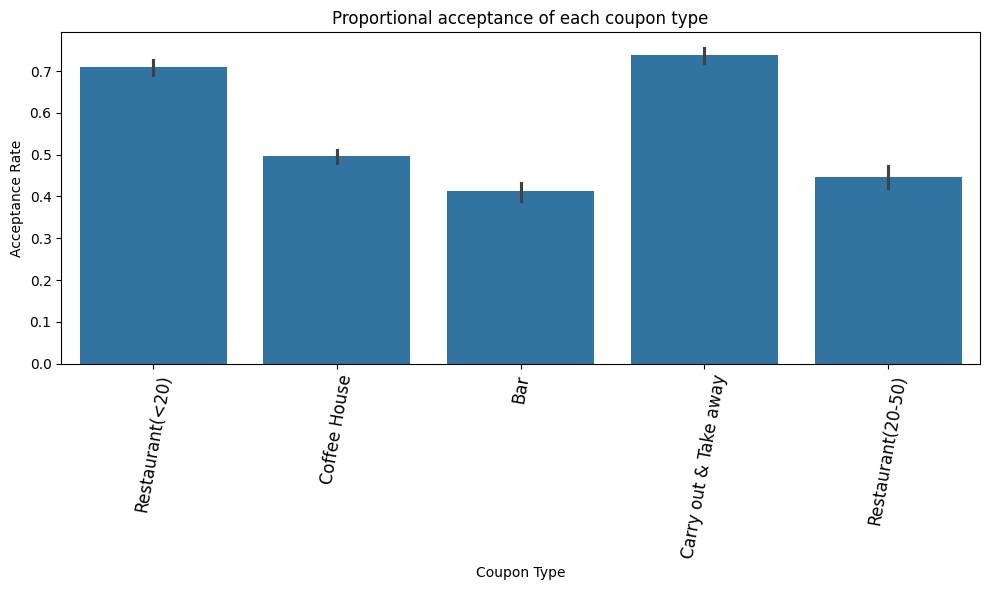

<Figure size 640x480 with 0 Axes>

In [27]:
# Study acceptance rate of each coupon
plt.figure(figsize=(10, 6))
sns.barplot(x="coupon", y='Y', data=data)
plt.xticks(rotation=80, fontsize=12)
plt.title('Proportional acceptance of each coupon type')
plt.xlabel("Coupon Type")
plt.ylabel("Acceptance Rate")
plt.tight_layout()
plt.show()
plt.savefig('images/Proportional_acceptance_of_each_coupon_type.png')




6. Use a histogram to visualize the temperature column.

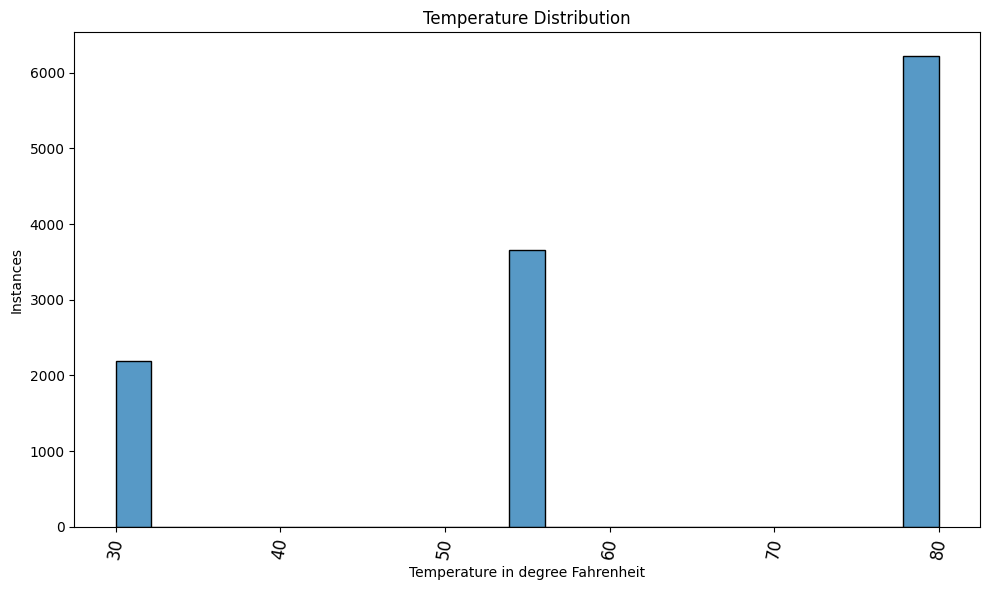

<Figure size 640x480 with 0 Axes>

In [28]:
#Study the distribution of temperature
plt.figure(figsize=(10, 6))
sns.histplot(data=data,x="temperature")
plt.xticks(rotation=80, fontsize=12)
plt.title('Temperature Distribution')
plt.xlabel("Temperature in degree Fahrenheit")
plt.ylabel("Instances")
plt.tight_layout()
plt.show()
plt.savefig('images/Temperature_Distribution.png')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [29]:
#Create Dataframe, subset of original DataFrame that containing just the bar coupons & check a sample
bar_coupons_only = data[data["coupon"]=="Bar"]

bar_coupons_only.sample()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
5149,No Urgent Place,Alone,Sunny,80,10AM,Bar,1d,Male,36,Married partner,0,Bachelors degree,Arts Design Entertainment Sports & Media,$100000 or More,less1,1~3,4~8,1~3,1~3,1,0,0,0,1,0


2. What proportion of bar coupons were accepted?


In [30]:
# Proportion of bar coupons that were accepted using mean concept as before
bar_coupons_only['Y'].mean()

np.float64(0.41191845269210664)

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [31]:
#Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.

display(bar_coupons_only[bar_coupons_only["Bar"].isin(["1~3","less1",'never'])]["Y"].mean())

display(bar_coupons_only[bar_coupons_only["Bar"].isin(["gtd8","4~8"])]["Y"].mean())

#Other options
#display(data[(data["Bar"]=="gtd8")| (data["Bar"]=="4~8") | (data["coupon"]=="Bar")]["Y"].mean())

#display(data[(data["Bar"]=="unknown") | (data["coupon"]=="Bar")]["Y"].mean())

#display(data[(data["Bar"]=="gtd8") | (data["coupon"]=="Bar")]["Y"].mean())

np.float64(0.37267441860465117)

np.float64(0.7755102040816326)

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [32]:
#Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.
display(bar_coupons_only[(bar_coupons_only["Bar"].isin(["1~3","4~8", "gtd8"]))& (bar_coupons_only["age"].isin(['46' '31', '41', '50plus', '36']))]["Y"].mean())
display(bar_coupons_only[(bar_coupons_only["Bar"].isin(["never","less1"]))& (bar_coupons_only["age"].isin(['21', 'below21']))]["Y"].mean())

np.float64(0.6060606060606061)

np.float64(0.3883495145631068)

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [34]:
#compare the acceptance rate between drivers who go to bars more than once a month and had passengers
  #that were not a kid and had occupations other than farming, fishing, or forestry.

#Create list of occupations minus (Farming, Fishing or Forestry) category
list_occu = ['Unemployed', 'Architecture & Engineering','Student',
 'Education&Training&Library', 'Healthcare Support',
 'Healthcare Practitioners & Technical', 'Sales & Related', 'Management',
 'Arts Design Entertainment Sports & Media', 'Computer & Mathematical',
 'Life Physical Social Science', 'Personal Care & Service',
 'Community & Social Services', 'Office & Administrative Support',
 'Construction & Extraction', 'Legal', 'Retired',
 'Installation Maintenance & Repair', 'Transportation & Material Moving',
 'Business & Financial', 'Protective Service',
 'Food Preparation & Serving Related', 'Production Occupations',
'Building & Grounds Cleaning & Maintenance']

#Compare
display(bar_coupons_only[(bar_coupons_only["Bar"].isin(['1~3','gt8','4~8'])) & (bar_coupons_only["passanger"].isin (['Alone', 'Friend(s)', 'Partner'])) & (bar_coupons_only["occupation"].isin(list_occu))]["Y"].mean())
display(bar_coupons_only[(bar_coupons_only["Bar"].isin(["less1", "never"])) & (bar_coupons_only["passanger"]=='Kid(s)')& (bar_coupons_only["occupation"]=="Farming Fishing & Forestry") ]["Y"].mean())


np.float64(0.7094339622641509)

np.float64(0.3333333333333333)

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [35]:
#Compare the acceptance rates between those drivers who:

#go to bars more than once a month, had passengers that were not a kid, and were not widowed
display(bar_coupons_only[(bar_coupons_only["Bar"].isin(['1~3','gt8', '4~8'])) & (bar_coupons_only["passanger"].isin (['Alone', 'Friend(s)', 'Partner'])) & (bar_coupons_only["maritalStatus"].isin (['Unmarried partner', 'Single', 'Married partner', 'Divorced']))]["Y"].mean())

#go to bars more than once a month and are under the age of 30
display(bar_coupons_only[(bar_coupons_only["Bar"].isin(['1~3','gt8', '4~8'])) &(bar_coupons_only["age"].isin (['21','26', 'below21']))]["Y"].mean())

#go to cheap restaurants more than 4 times a month and income is less than 50K
display(bar_coupons_only[(bar_coupons_only["RestaurantLessThan20"].isin(['gt8', '4~8'])) &(bar_coupons_only["income"].isin (['$37500 - $49999' ,'$12500 - $24999',  '$25000 - $37499',  'Less than $12500']))]["Y"].mean())

np.float64(0.7094339622641509)

np.float64(0.7195121951219512)

np.float64(0.45645645645645644)

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

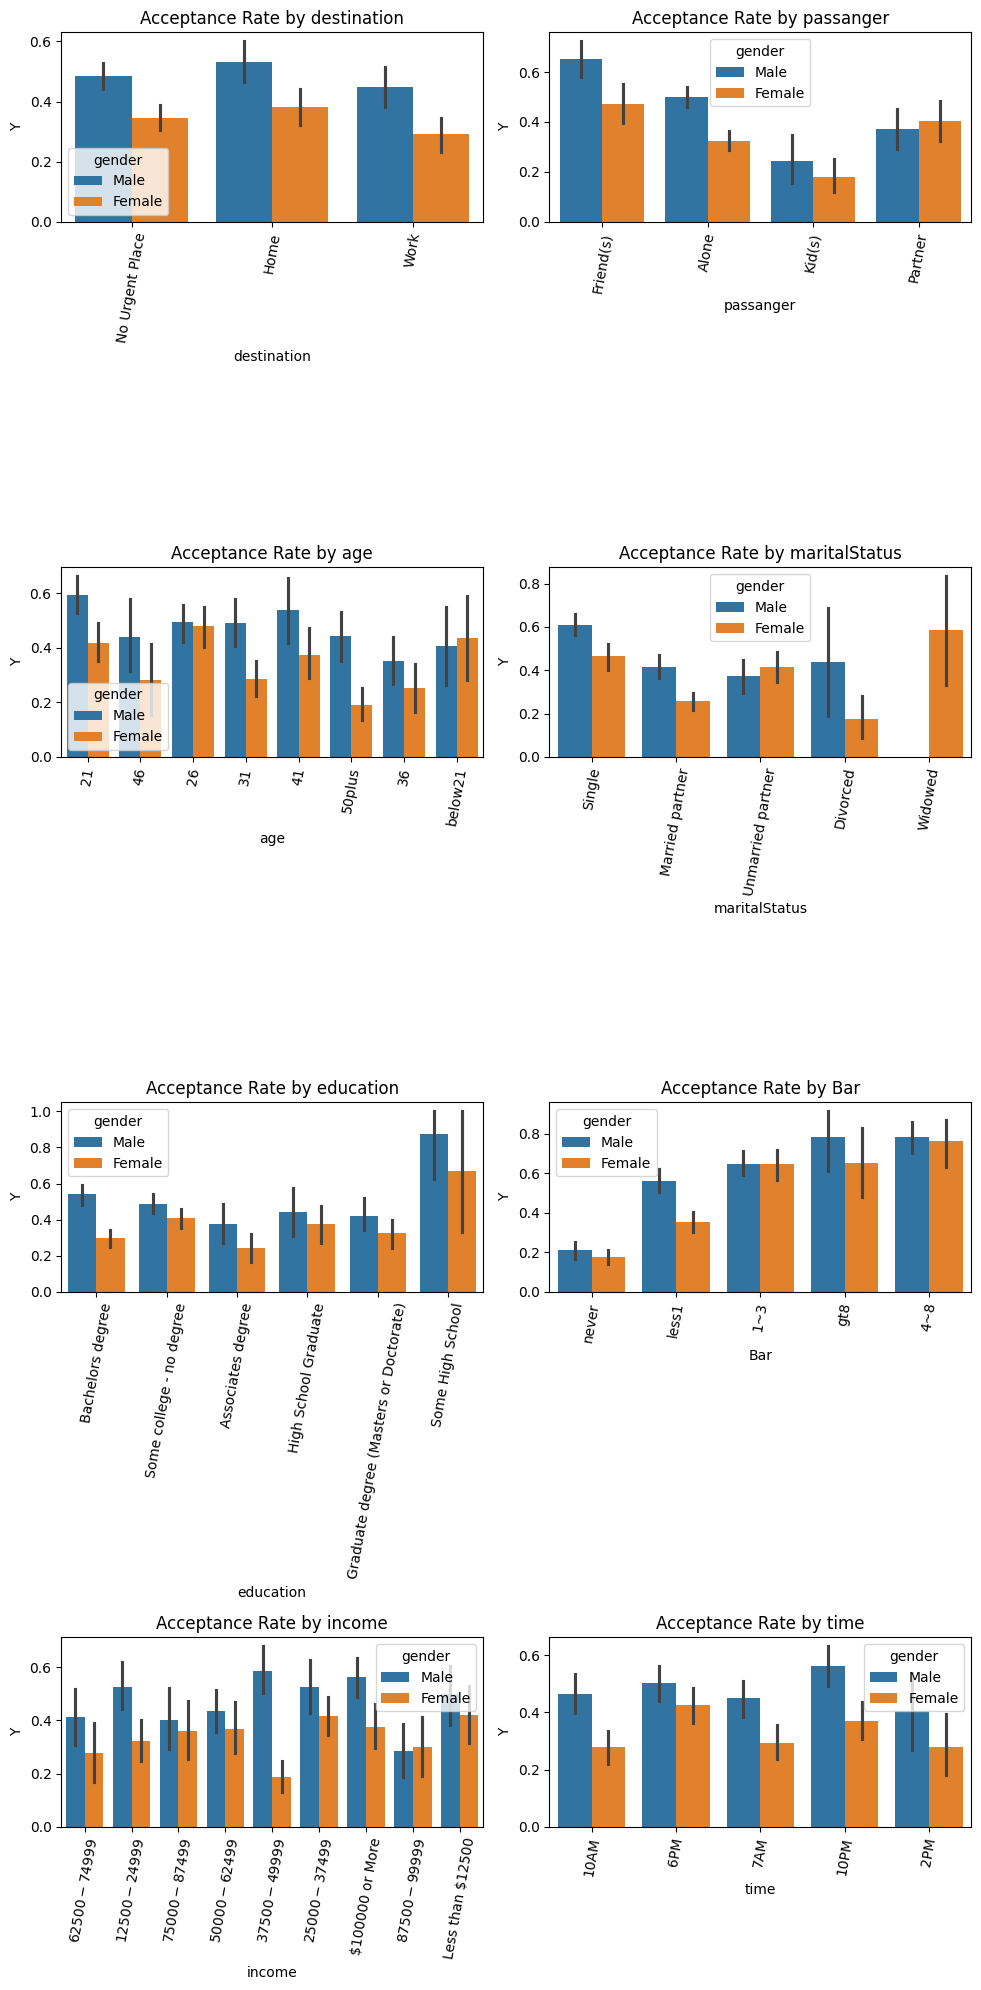

In [63]:
# Select categorical and numerical columns
categorical_cols = ['destination', 'passanger', 'age', 'maritalStatus', 'education', 'Bar', 'income', 'time']


# Create a figure and subplots for three plots in one row
fig, axes = plt.subplots(4, 2, figsize=(10, 20))  # 1 row, 3 columns

# Plot the first six categorical columns
for i, col in enumerate(categorical_cols[:8]):  # Plot the eight categorical columns
    row = i // 2  # Calculate the row index
    col_num = i % 2  # Calculate the column index
    sns.barplot(ax=axes[row, col_num], data=bar_coupons_only, x=col, y='Y', hue='gender')  # Bar plot for each categorical column
    axes[row, col_num].set_title(f'Acceptance Rate by {col}')    #Title formatting not carried. can be further improved
    axes[row, col_num].set_xlabel(col) #ONly xlabels used, y label dropped to avoid clutter and repitition on y axis of each subplot
    axes[row, col_num].tick_params(axis='x', rotation=80)

#axes[row, col_num].set_ylabel('Acceptance Rate')


plt.subplots_adjust(hspace=2.0)  # Give space for the x axis labels to be written. Some labels are long and ugly
plt.tight_layout()  #prevent overlapping
plt.show()

In [65]:
# Find proportions based on combinations of two columns- gender and destination and groups within
acceptance_by_gender_destination = bar_coupons_only.groupby(['gender', 'destination'])['Y'].mean().reset_index()

#Output the proportions in descending order to find highest and lowest values
print(acceptance_by_gender_destination.sort_values(by="Y", ascending=False))

   gender      destination         Y
3    Male             Home  0.530435
4    Male  No Urgent Place  0.484979
5    Male             Work  0.448889
0  Female             Home  0.380952
1  Female  No Urgent Place  0.345924
2  Female             Work  0.291139


In [68]:
# Find proportions based on combinations of two columns- passenger and gender and groups within
acceptance_by_gender_passenger = bar_coupons_only.groupby(['passanger', 'gender'])['Y'].mean().reset_index()

#Output the proportions in descending order to find highest and lowest values
print(acceptance_by_gender_passenger.sort_values(by="Y", ascending=False))

   passanger  gender         Y
3  Friend(s)    Male  0.650602
1      Alone    Male  0.499096
2  Friend(s)  Female  0.473684
6    Partner  Female  0.404412
7    Partner    Male  0.370968
0      Alone  Female  0.324830
5     Kid(s)    Male  0.243590
4     Kid(s)  Female  0.181034


In [69]:
# Find proportions based on combinations of two columns- gender and marital status and groups within
acceptance_by_gender_Marital_Status = bar_coupons_only.groupby(['gender', 'maritalStatus'])['Y'].mean().reset_index()

#Output the proportions in descending order to find highest and lowest values
print(acceptance_by_gender_Marital_Status.sort_values(by="Y", ascending=False))

   gender      maritalStatus         Y
7    Male             Single  0.610390
4  Female            Widowed  0.583333
2  Female             Single  0.466403
5    Male           Divorced  0.437500
3  Female  Unmarried partner  0.415842
6    Male    Married partner  0.413699
8    Male  Unmarried partner  0.373333
1  Female    Married partner  0.256410
0  Female           Divorced  0.175439
9    Male            Widowed  0.000000


In [73]:
# Find proportions based on combinations of three columns- gender, marital status and age and groups within
acceptance_by_gender_maritalStatus_age = bar_coupons_only.groupby(['gender', 'maritalStatus', 'age'])['Y'].mean().reset_index()

#Output the proportions in descending order to find highest and lowest values
print(acceptance_by_gender_maritalStatus_age.sort_values(by="Y", ascending=False))

    gender      maritalStatus      age         Y
30    Male           Divorced   50plus  1.000000
44    Male             Single   50plus  0.900000
42    Male             Single       41  0.800000
13  Female             Single       26  0.716981
48    Male  Unmarried partner       31  0.666667
16  Female             Single       41  0.666667
38    Male             Single       21  0.647482
12  Female             Single       21  0.615385
39    Male             Single       26  0.592593
28  Female            Widowed   50plus  0.583333
19  Female             Single  below21  0.562500
41    Male             Single       36  0.545455
40    Male             Single       31  0.534884
45    Male             Single  below21  0.531250
35    Male    Married partner       41  0.525000
43    Male             Single       46  0.500000
46    Male  Unmarried partner       21  0.477273
21  Female  Unmarried partner       26  0.462963
20  Female  Unmarried partner       21  0.454545
33    Male    Marrie

In [74]:
# Find proportions based on age group only
acceptance_by_age = bar_coupons_only.groupby(['age'])['Y'].mean().reset_index()

#Output the proportions in descending order to find highest and lowest values
print(acceptance_by_age.sort_values(by="Y", ascending=False))

       age         Y
0       21  0.503778
1       26  0.486413
4       41  0.438596
7  below21  0.419753
2       31  0.376543
5       46  0.368932
3       36  0.306122
6   50plus  0.293040


Hypothesis on Bar Coupons




*   Overall, bar coupons tend to be accepted lower than coupons for cheap restaurants and carryaway/takeout coupons.

*   Gender : Bar coupons tend to be used by males more than females.

*   Age : Younger drivers in age bracket 21-36 tend to accept the bar coupons more than older ones.

*   Marital Status : Drivers in "Single/Divorced 41/50 plus men and widowed, 50 plus women" tend to accept bar coupons more than the others. Single below 21 women tend to accept rarely.

*   Drivers tend to accept bar coupons more when they are heading home.

*   Drivers who are high school or equivalent tend to accept bar coupons more than the others irrespective of the gender.

*   Drivers tend to accept bar coupons when the passenger is a friend and tend to accept less when it is is a kid.

*   Drivers tend to accept bar coupons more at time around 2 PM and 10 PM

*   Bar coupons acceptance seems to have posiitve correaltion with frequency of bar visits by a driver.








### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [75]:
#Create Dataframe, subset of original DataFrame that containing just the coffee coupons & check a sample
coffee_coupons_only = data[data["coupon"]=="Coffee House"]

coffee_coupons_only.sample()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
96,No Urgent Place,Friend(s),Sunny,80,6PM,Coffee House,2h,Male,21,Single,0,Associates degree,Student,$12500 - $24999,1~3,less1,1~3,less1,1~3,1,0,0,0,1,1


In [76]:
# Proportion of coffe house coupons that were accepted using mean concept as before
coffee_coupons_only['Y'].mean()

np.float64(0.49633123689727465)

In [79]:
#Compare the acceptance rate between those who went to a coffee house 3 or fewer times a month to those who went more.

display(coffee_coupons_only[coffee_coupons_only["CoffeeHouse"].isin(["1~3","less1",'never'])]["Y"].mean())

display(coffee_coupons_only[coffee_coupons_only["CoffeeHouse"].isin(["gtd8","4~8"])]["Y"].mean())

np.float64(0.44590495449949447)

np.float64(0.6824457593688363)

In [80]:
#Compare the acceptance rate between drivers who go to a coffee house more than once a month and are over the age of 25 to the all others.
display(coffee_coupons_only[(coffee_coupons_only["CoffeeHouse"].isin(["1~3","4~8", "gtd8"]))& (coffee_coupons_only["age"].isin(['46' '31', '41', '50plus', '36']))]["Y"].mean())
display(coffee_coupons_only[(coffee_coupons_only["CoffeeHouse"].isin(["never","less1"]))& (coffee_coupons_only["age"].isin(['21', 'below21']))]["Y"].mean())

np.float64(0.6175824175824176)

np.float64(0.3485838779956427)

In [81]:
#compare the acceptance rate between drivers who go to bars more than once a month and had passengers
  #that were not a kid and had occupations other than farming, fishing, or forestry.

#Create list of occupations minus (Farming, Fishing or Forestry) category
list_occu = ['Unemployed', 'Architecture & Engineering','Student',
 'Education&Training&Library', 'Healthcare Support',
 'Healthcare Practitioners & Technical', 'Sales & Related', 'Management',
 'Arts Design Entertainment Sports & Media', 'Computer & Mathematical',
 'Life Physical Social Science', 'Personal Care & Service',
 'Community & Social Services', 'Office & Administrative Support',
 'Construction & Extraction', 'Legal', 'Retired',
 'Installation Maintenance & Repair', 'Transportation & Material Moving',
 'Business & Financial', 'Protective Service',
 'Food Preparation & Serving Related', 'Production Occupations',
'Building & Grounds Cleaning & Maintenance']

#Compare
display(coffee_coupons_only[(coffee_coupons_only["CoffeeHouse"].isin(['1~3','gt8','4~8'])) & (coffee_coupons_only["passanger"].isin (['Alone', 'Friend(s)', 'Partner'])) & (coffee_coupons_only["occupation"].isin(list_occu))]["Y"].mean())
display(coffee_coupons_only[(coffee_coupons_only["CoffeeHouse"].isin(["less1", "never"])) & (coffee_coupons_only["passanger"]=='Kid(s)')& (coffee_coupons_only["occupation"]=="Farming Fishing & Forestry") ]["Y"].mean())


np.float64(0.6596710153148043)

np.float64(0.6666666666666666)

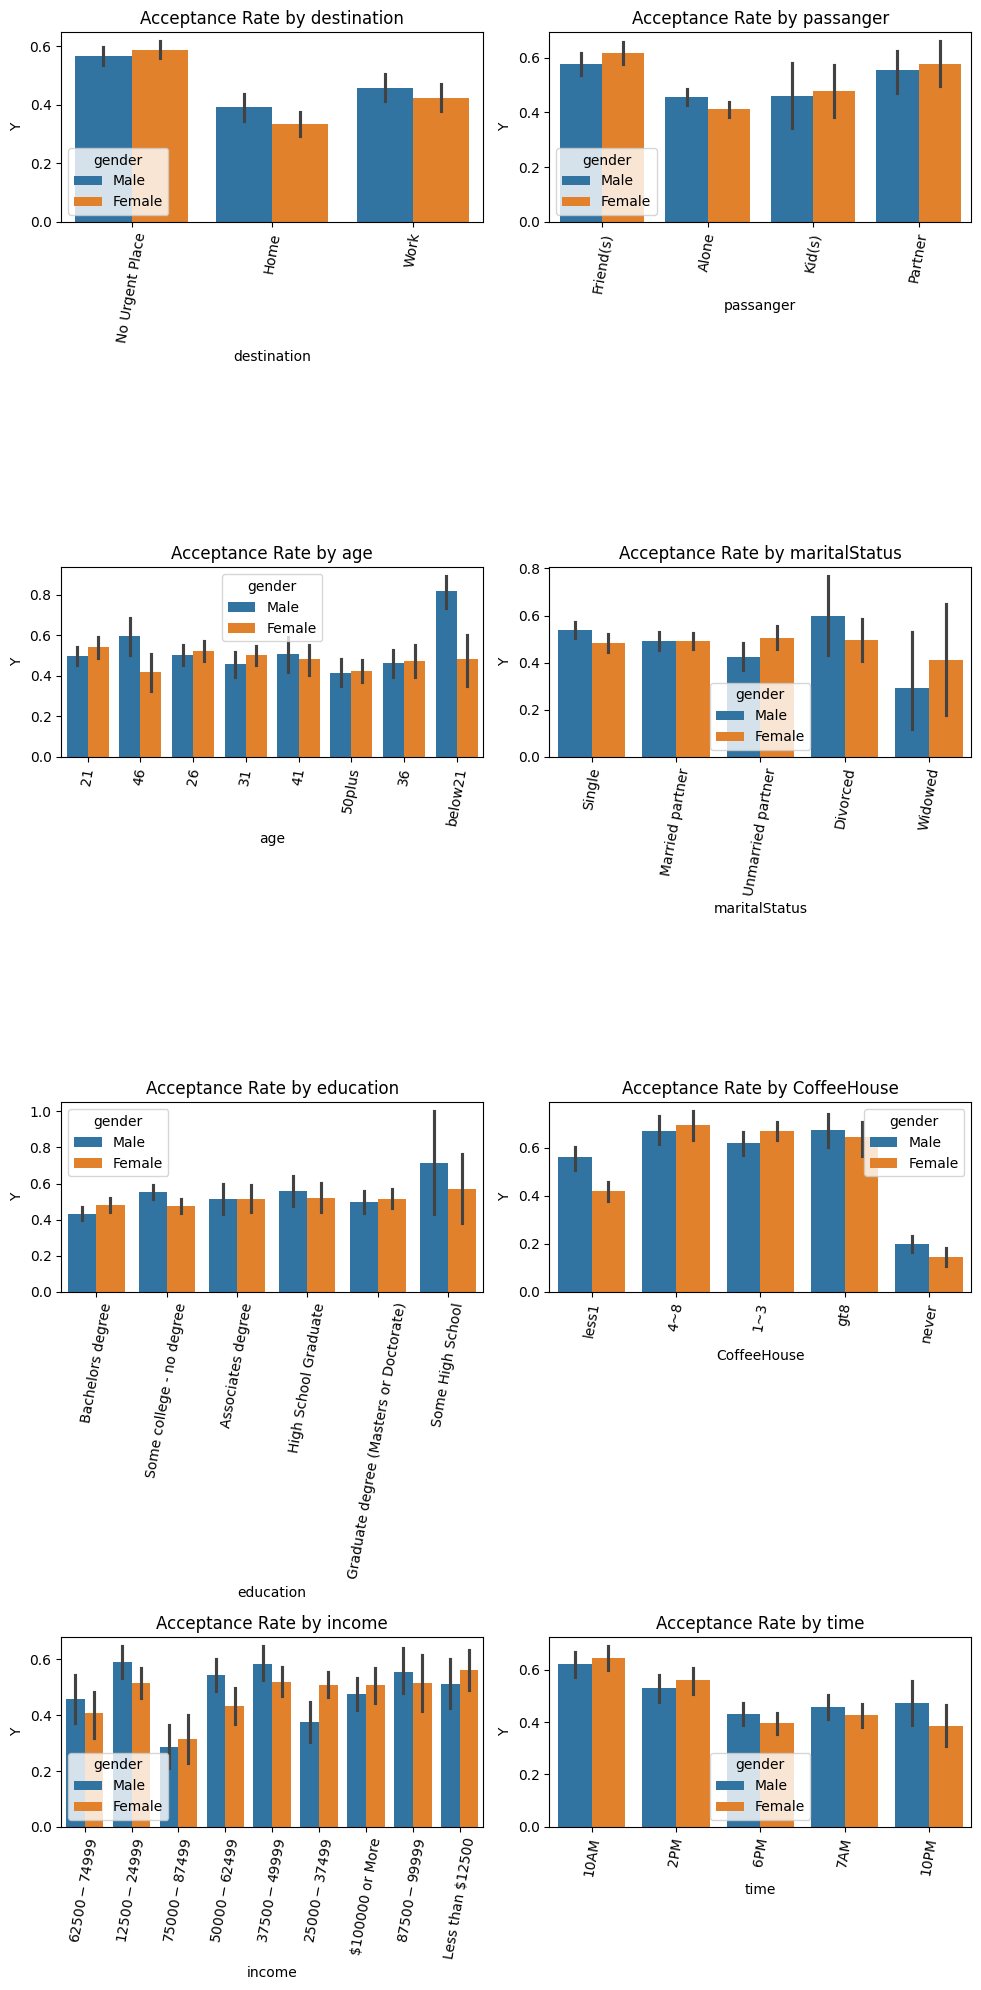

In [82]:
# Select categorical and numerical columns
categorical_cols = ['destination', 'passanger', 'age', 'maritalStatus', 'education', 'CoffeeHouse', 'income', 'time']


# Create a figure and subplots for three plots in one row
fig, axes = plt.subplots(4, 2, figsize=(10, 20))  # 1 row, 3 columns

# Plot the first six categorical columns
for i, col in enumerate(categorical_cols[:8]):  # Plot the eight categorical columns
    row = i // 2  # Calculate the row index
    col_num = i % 2  # Calculate the column index
    sns.barplot(ax=axes[row, col_num], data=coffee_coupons_only, x=col, y='Y', hue='gender')  # Bar plot for each categorical column
    axes[row, col_num].set_title(f'Acceptance Rate by {col}')    #Title formatting not carried. can be further improved
    axes[row, col_num].set_xlabel(col) #ONly xlabels used, y label dropped to avoid clutter and repitition on y axis of each subplot
    axes[row, col_num].tick_params(axis='x', rotation=80)

#axes[row, col_num].set_ylabel('Acceptance Rate')


plt.subplots_adjust(hspace=2.0)  # Give space for the x axis labels to be written. Some labels are long and ugly
plt.tight_layout()  #prevent overlapping
plt.show()

In [84]:
# Find proportions based on combinations of two columns- gender and destination and groups within
coffee_coupon_acceptance_by_gender_destination = coffee_coupons_only.groupby(['gender', 'destination'])['Y'].mean().reset_index()

#Output the proportions in descending order to find highest and lowest values
print(coffee_coupon_acceptance_by_gender_destination.sort_values(by="Y", ascending=False))

   gender      destination         Y
1  Female  No Urgent Place  0.588011
4    Male  No Urgent Place  0.567864
5    Male             Work  0.456311
2  Female             Work  0.425486
3    Male             Home  0.392610
0  Female             Home  0.334066


In [85]:
# Find proportions based on combinations of two columns- passenger and gender and groups within
coffee_coupon_acceptance_by_gender_passenger = coffee_coupons_only.groupby(['passanger', 'gender'])['Y'].mean().reset_index()

#Output the proportions in descending order to find highest and lowest values
print(coffee_coupon_acceptance_by_gender_passenger.sort_values(by="Y", ascending=False))

   passanger  gender         Y
2  Friend(s)  Female  0.616027
6    Partner  Female  0.578231
3  Friend(s)    Male  0.578125
7    Partner    Male  0.555556
4     Kid(s)  Female  0.478632
5     Kid(s)    Male  0.460526
1      Alone    Male  0.455756
0      Alone  Female  0.413201


In [86]:
# Find proportions based on combinations of two columns- gender and marital status and groups within
coffee_coupon_acceptance_by_gender_Marital_Status = coffee_coupons_only.groupby(['gender', 'maritalStatus'])['Y'].mean().reset_index()

#Output the proportions in descending order to find highest and lowest values
print(coffee_coupon_acceptance_by_gender_Marital_Status.sort_values(by="Y", ascending=False))

   gender      maritalStatus         Y
5    Male           Divorced  0.600000
7    Male             Single  0.539016
3  Female  Unmarried partner  0.506667
0  Female           Divorced  0.495575
1  Female    Married partner  0.491250
6    Male    Married partner  0.490991
2  Female             Single  0.483434
8    Male  Unmarried partner  0.425249
4  Female            Widowed  0.411765
9    Male            Widowed  0.294118


In [87]:
# Find proportions based on age group only
coffee_coupon_acceptance_by_age = coffee_coupons_only.groupby(['age'])['Y'].mean().reset_index()

#Output the proportions in descending order to find highest and lowest values
print(coffee_coupon_acceptance_by_age.sort_values(by="Y", ascending=False))

       age         Y
7  below21  0.678322
0       21  0.517773
1       26  0.513174
5       46  0.506912
4       41  0.492114
2       31  0.483816
3       36  0.468586
6   50plus  0.419660


Hypothesis on Coffee Coupons

- Younger drivers tend to accept coffee coupons more.
- Females tend to accept coffee coupons with friends and partners.
- Both genders have higher tendency to accept the coupons when not heading to any urgent place.
-10 AM seems to be best time for offering coffee coupons.
-
